In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection, linear_model, ensemble, svm, tree, metrics, grid_search
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier

In [183]:
X = pd.read_csv("X_tweet_nuria.csv")
y_fc = pd.read_csv("y_fc_tweet_nuria.csv", header = None)
y_rt = pd.read_csv("y_rt_tweet_nuria.csv", header = None)

In [184]:
y_fc = np.array(y_fc)
y_rt = np.array(y_rt)
X = np.array(X)

In [185]:
y_fc = np.concatenate(y_fc)
y_rt = np.concatenate(y_rt)
print(y_fc)
print(y_rt)

[18  0  4 ...  6 11  0]
[4 0 2 ... 1 1 0]


In [186]:
class segmenta():
    
    def __init__(self):
        self.intervals = {}
    
    def transform(self,y):
        k, z = 0, 0
        for a, b in [[20,1],
                     [100,10],
                     [500,100],
                     [1000,500]]: 
            for i in np.arange(z,a,b):
                self.intervals[k] = [i,i+b-1]
                k+=1
            z = a
        self.intervals[k] = [1000,99999999]

        y = np.reshape(y.values, (-1,1))
        for j in self.intervals:
            c = self.intervals[j]
            idx = np.where(np.logical_and(y>=c[0],y<=c[1]))[0]
            y[idx] = j
        return y

In [187]:
seg = segmenta()
y_fc = seg.transform(pd.DataFrame(y_fc))
y_rt = seg.transform(pd.DataFrame(y_rt))

In [188]:
y_fc = y_fc.T[0]
y_rt = y_rt.T[0]
print(y_fc[0])
seg.intervals[y_fc[0]]

18


[18, 18]

[0, 0]
34
{0: [0, 0], 1: [1, 1], 2: [2, 2], 3: [3, 3], 4: [4, 4], 5: [5, 5], 6: [6, 6], 7: [7, 7], 8: [8, 8], 9: [9, 9], 10: [10, 10], 11: [11, 11], 12: [12, 12], 13: [13, 13], 14: [14, 14], 15: [15, 15], 16: [16, 16], 17: [17, 17], 18: [18, 18], 19: [19, 19], 20: [20, 29], 21: [30, 39], 22: [40, 49], 23: [50, 59], 24: [60, 69], 25: [70, 79], 26: [80, 89], 27: [90, 99], 28: [100, 199], 29: [200, 299], 30: [300, 399], 31: [400, 499], 32: [500, 999], 33: [1000, 99999999]}
[18  0  4 ...  6 11  0]
[2058 1004  397  186  114   79   55   38   31   28   26   21   18   17
    9    7   10    9    4    5   37   21   22   14    6    2    5    6
   20    9    6    4   11   10]


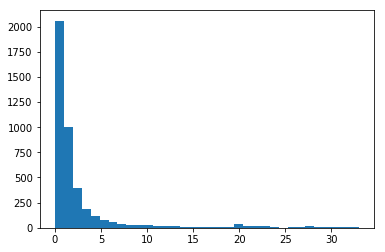

In [189]:
# Calculem els pesos
## Necessitem la frequencia de cada interval
i = 0
print(seg.intervals[i])
print(len(seg.intervals))
print(seg.intervals)
print(y_fc)

hist, bin_edges = np.histogram(y_fc, len(seg.intervals))
print(hist)
plt.hist(y_fc, bins=bin_edges)
plt.show()

In [190]:
X = np.c_[np.arange(0,X.shape[0],1), X, np.ones(X.shape[0])]
print(X)

[[0.000e+00 0.000e+00 0.000e+00 ... 7.162e+03 0.000e+00 1.000e+00]
 [1.000e+00 1.000e+00 0.000e+00 ... 5.310e+02 0.000e+00 1.000e+00]
 [2.000e+00 2.000e+00 0.000e+00 ... 7.162e+03 0.000e+00 1.000e+00]
 ...
 [4.286e+03 4.286e+03 0.000e+00 ... 2.040e+02 0.000e+00 1.000e+00]
 [4.287e+03 4.287e+03 0.000e+00 ... 2.040e+02 0.000e+00 1.000e+00]
 [4.288e+03 4.288e+03 0.000e+00 ... 1.970e+02 0.000e+00 1.000e+00]]


In [215]:
for j in np.arange(14,34,1):
    X[:, X.shape[1]-1] = np.where(y_fc == j, 10, X[:, X.shape[1]-1])
for j in np.arange(6,14,1):
    X[:, X.shape[1]-1] = np.where(y_fc == j, 4, X[:, X.shape[1]-1])
#for j in np.arange(0,3,1):
    #X[:, X.shape[1]-1] = np.where((y_fc == j), 0, X[:, X.shape[1]-1])
    #X[np.where(y_fc == j)][101:X[np.where(y_fc == 0)].shape[0], X.shape[1]-1] = 0
print(X)
print(X[:, X.shape[1]-1])
print(X.shape)
print(pd.DataFrame(X[:, X.shape[1]-1]))
print((pd.DataFrame(X[:, X.shape[1]-1])).describe())
np.where(X[:, X.shape[1]-1] > 5)

[[0.000e+00 0.000e+00 0.000e+00 ... 7.162e+03 0.000e+00 1.000e+01]
 [1.000e+00 1.000e+00 0.000e+00 ... 5.310e+02 0.000e+00 1.000e+00]
 [2.000e+00 2.000e+00 0.000e+00 ... 7.162e+03 0.000e+00 1.000e+00]
 ...
 [4.286e+03 4.286e+03 0.000e+00 ... 2.040e+02 0.000e+00 4.000e+00]
 [4.287e+03 4.287e+03 0.000e+00 ... 2.040e+02 0.000e+00 4.000e+00]
 [4.288e+03 4.288e+03 0.000e+00 ... 1.970e+02 0.000e+00 1.000e+00]]
[10.  1.  1. ...  4.  4.  1.]
(4289, 3973)
         0
0     10.0
1      1.0
2      1.0
3     10.0
4      1.0
5      4.0
6      1.0
7      1.0
8      1.0
9      1.0
10     4.0
11     1.0
12     1.0
13     4.0
14     4.0
15     1.0
16     4.0
17     1.0
18     1.0
19     4.0
20     4.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
...    ...
4259   1.0
4260   1.0
4261   1.0
4262   1.0
4263   1.0
4264   1.0
4265   1.0
4266   1.0
4267   1.0
4268   1.0
4269   1.0
4270   1.0
4271   1.0
4272   1.0
4273   1.0
4274   1.0
4275   1.0
4276   1.0

(array([   0,    3,   93,  137,  149,  161,  213,  251,  255,  266,  310,
         339,  354,  360,  438,  457,  503,  504,  513,  515,  519,  521,
         561,  684,  686,  687,  697,  847,  850,  889,  890,  891,  892,
         967,  988, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
        1099, 1100, 1101, 1127, 1189, 1275, 1325, 1343, 1344, 1345, 1346,
        1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357,
        1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1379, 1386,
        1549, 1584, 1671, 1738, 1831, 2000, 2050, 2051, 2113, 2120, 2194,
        2196, 2213, 2245, 2318, 2403, 2404, 2405, 2407, 2408, 2411, 2412,
        2413, 2649, 2665, 2669, 2672, 2700, 2822, 2825, 2846, 2883, 2886,
        2935, 3164, 3172, 3173, 3177, 3181, 3185, 3186, 3274, 3281, 3285,
        3286, 3289, 3290, 3292, 3293, 3294, 3295, 3296, 3298, 3300, 3304,
        3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320,
        3321, 3322, 3323, 3324, 3325, 

In [218]:
X = pd.DataFrame(X)
#X[X.shape[1]-1] = int(X[X.shape[1]-1])
for i in range(1,X.shape[1]):
        z = X.set_index([0])[i].repeat(X[X.shape[1]-1].astype(int)).reset_index()
        print(z.iloc[:,1].values)
        if i == 1:
            x_final = z.iloc[:,1].values
        else:
            x_final = np.c_[x_final, z.iloc[:,1].values]
print(x_final)

TypeError: cannot convert the series to <class 'int'>

In [208]:
x = np.array([[1,1,1], [0,-1,1], [4,4,4]])
print(x)
print(np.where(x[:,1]>0))
x[:, 1] = np.where(x[:,1]>0, 0, x[:,1])
print(x)
#df['Lista'] = np.where(df['Lista'], 'presente', 'falta')

[[ 1  1  1]
 [ 0 -1  1]
 [ 4  4  4]]
(array([0, 2], dtype=int64),)
[[ 1  0  1]
 [ 0 -1  1]
 [ 4  0  4]]


In [158]:
# set_index y repeat
x = np.array([[1,1,1], [0,-1,1], [4,4,4]])
x = np.c_[np.arange(0,x.shape[0],1),x, np.array([2,1,4])]
#x = np.c_[np.arange(0,x.shape[0],1), x]
print('x=', x)
x = pd.DataFrame(x)
for i in range(1,x.shape[1]):
    z = x.set_index([0])[i].repeat(x[4]).reset_index()
    print(z.iloc[:,1].values)
    if i == 1:
        x_final = z.iloc[:,1].values
    else:
        x_final = np.c_[x_final, z.iloc[:,1].values]
print(x_final)

x= [[ 0  1  1  1  2]
 [ 1  0 -1  1  1]
 [ 2  4  4  4  4]]
[1 1 0 4 4 4 4]
[ 1  1 -1  4  4  4  4]
[1 1 1 4 4 4 4]
[2 2 1 4 4 4 4]
[[ 1  1  1  2]
 [ 1  1  1  2]
 [ 0 -1  1  1]
 [ 4  4  4  4]
 [ 4  4  4  4]
 [ 4  4  4  4]
 [ 4  4  4  4]]


In [8]:
cv = model_selection.KFold(n_splits = 5, shuffle=True, random_state=42)
cv.get_n_splits(X)


acc_rt = np.zeros((10,6))
acc_fc = np.zeros((10,1))

# Models que millors resultats donen son els seguents:
nn10 = neighbors.KNeighborsClassifier(n_neighbors=10) #rt
#nn10 = model_selection.GridSearchCV(nn10, parameters, scoring='precision_macro')
nn12 = neighbors.KNeighborsClassifier(n_neighbors=12) #rt
#nn12 = model_selection.GridSearchCV(nn12, parameters, scoring='precision_macro')
abc100 = AdaBoostClassifier(n_estimators=100)  #rt i fc
#abc100 = model_selection.GridSearchCV(abc100, parameters, scoring='precision_macro')

#Afegim tambe:
nn9 = neighbors.KNeighborsClassifier(n_neighbors=9) #rt
#nn9 = model_selection.GridSearchCV(nn9, parameters, scoring='precision_macro')
nn11 = neighbors.KNeighborsClassifier(n_neighbors=11) #rt
#nn11 = model_selection.GridSearchCV(nn11, parameters, scoring='precision_macro')
nn13 = neighbors.KNeighborsClassifier(n_neighbors=13) #rt
#nn13 = model_selection.GridSearchCV(nn13, parameters, scoring='precision_macro')

[[0.5034965  0.5034965 ]
 [0.46386946 0.46386946]
 [0.45454545 0.45454545]
 [0.5011655  0.5011655 ]
 [0.46853147 0.47086247]
 [0.45687646 0.45454545]
 [0.48717949 0.48951049]
 [0.5011655  0.5011655 ]
 [0.46153846 0.46153846]
 [0.49299065 0.49299065]]


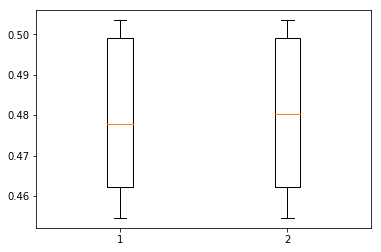

In [9]:
i = 0
for train_idx, test_idx in cv.split(X):
    X_train,y_train = X[train_idx,:],y_fc[train_idx]
    X_test,y_test = X[test_idx,:],y_fc[test_idx]
    
    scaler = StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #abc100
    abc100.fit(X_train_scaled,y_train)
    yhat_abc100 = abc100.predict(X_test_scaled).reshape(-1,1)
    acc_fc[i,0] = metrics.accuracy_score(y_test,yhat_abc100)


    i = i+1
    
fig = plt.figure()
plt.boxplot(acc_fc)
print(acc_fc)

[[0.78787879 0.78787879 0.78787879 0.78787879 0.78787879 0.78787879
  0.78321678]
 [0.78554779 0.78321678 0.78321678 0.78321678 0.78321678 0.78321678
  0.78321678]
 [0.79254079 0.79254079 0.79254079 0.79254079 0.79254079 0.79254079
  0.79254079]
 [0.78088578 0.78088578 0.78088578 0.78088578 0.78088578 0.78088578
  0.78088578]
 [0.76923077 0.76689977 0.76689977 0.76689977 0.76689977 0.76689977
  0.76689977]
 [0.75990676 0.75990676 0.75990676 0.75990676 0.75990676 0.75757576
  0.75990676]
 [0.79254079 0.79254079 0.79254079 0.79254079 0.79254079 0.79487179
  0.79254079]
 [0.7995338  0.7995338  0.7995338  0.7995338  0.7995338  0.7972028
  0.7972028 ]
 [0.79487179 0.79254079 0.79487179 0.79487179 0.79487179 0.79254079
  0.79254079]
 [0.77570093 0.77570093 0.77570093 0.77570093 0.77570093 0.77336449
  0.77336449]]


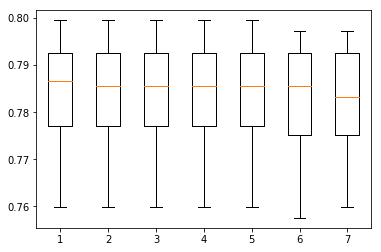

In [11]:
i = 0
for train_idx, test_idx in cv.split(X):
    X_train,y_train = X[train_idx,:],y_rt[train_idx]
    X_test,y_test = X[test_idx,:],y_rt[test_idx]
    
    scaler = StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    
    nn9.fit(X_train_scaled,y_train)
    nn10.fit(X_train_scaled,y_train)
    nn11.fit(X_train_scaled,y_train)
    nn12.fit(X_train_scaled,y_train)
    nn13.fit(X_train_scaled,y_train)
    abc100.fit(X_train_scaled,y_train)
    
    X_test_scaled = scaler.transform(X_test)
    yhat_nn9 = nn9.predict(X_test_scaled).reshape(-1,1)
    yhat_nn10 = nn10.predict(X_test_scaled).reshape(-1,1)
    yhat_nn11 = nn11.predict(X_test_scaled).reshape(-1,1)
    yhat_nn12 = nn12.predict(X_test_scaled).reshape(-1,1)
    yhat_nn13 = nn13.predict(X_test_scaled).reshape(-1,1)
    yhat_abc100 = abc100.predict(X_test_scaled).reshape(-1,1)
    
    
    acc_rt[i,0] = metrics.accuracy_score(y_test,yhat_nn9)
    acc_rt[i,1] = metrics.accuracy_score(y_test,yhat_nn10)
    acc_rt[i,2] = metrics.accuracy_score(y_test,yhat_nn11)
    acc_rt[i,3] = metrics.accuracy_score(y_test,yhat_nn12)
    acc_rt[i,4] = metrics.accuracy_score(y_test,yhat_nn13)
    acc_rt[i,5] = metrics.accuracy_score(y_test,yhat_abc100)
    
    i = i+1
    
    
fig = plt.figure()
plt.boxplot(acc_rt)
print(acc_rt)